In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Flight_Pred.csv")

In [3]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (10683, 10)


In [4]:
print("\nColumns in Dataset:", df.columns)


Columns in Dataset: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB
None


In [6]:
print(df.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [7]:
print(df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop   3897  
1    05:50         13:15   7h 25m     2 stops   7662  
2    09:25  04:25 10 Jun      19h     2 stops  13882  
3    18:05         23:30   5h 25m      1 stop   6218  
4    16:50         21:35   4h 45m      1 stop  13302  


In [8]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64


In [9]:
# Drop columns with null values
df = df.dropna()

# Verify if null values are removed
print("Missing Values After Dropping:")
print(df.isnull().sum())


Missing Values After Dropping:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [10]:
df.shape

(10682, 10)

In [11]:
df.duplicated().sum()

np.int64(220)

In [12]:
#droping the duplicates
df.drop_duplicates(keep='first',inplace=True)

In [13]:
# Convert 'Total_Stops' to numeric values
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': '0 stop'})  # Replace 'non-stop' with '0 stop'
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]  # Extract numeric part
df['Total_Stops'] = df['Total_Stops'].astype(int)  # Convert to integer

# Verify conversion
print(df[['Total_Stops']].head())


   Total_Stops
0            0
1            2
2            2
3            1
4            1


In [14]:
df['Destination'] = np.where(df['Destination']=="New Delhi","Delhi",df['Destination'])

In [15]:
df['Airline'] = np.where(df['Airline']=="Trujet","Multiple carriers",df['Airline'])

In [16]:
df['Airline'] = np.where(df['Airline']=="Jet Airways Business","Jet Airways",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Vistara Premium economy","Vistara",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Multiple carriers Premium economy","Multiple carriers",df['Airline'])

In [17]:
# Function to convert duration into hours and minutes
def convert_duration(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'h' in duration else int(duration.replace('m', '').strip())
    return hours, minutes

# Apply function to extract hours and minutes
df[['Duration_hours', 'Duration_minutes']] = df['Duration'].apply(lambda x: pd.Series(convert_duration(x)))

# Drop original Duration column
df.drop(columns=['Duration'], inplace=True)

# Verify conversion
print(df[['Duration_hours', 'Duration_minutes']].head())


   Duration_hours  Duration_minutes
0               2                50
1               7                25
2              19                 0
3               5                25
4               4                45


In [18]:
# Convert Date_of_Journey to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract day, month, and year
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

# Drop the original Date_of_Journey column
df.drop(columns=['Date_of_Journey'], inplace=True)

# Verify conversion
print(df[['Journey_Day', 'Journey_Month', 'Journey_Year']].head())


   Journey_Day  Journey_Month  Journey_Year
0           24              3          2019
1            1              5          2019
2            9              6          2019
3           12              5          2019
4            1              3          2019


In [19]:
# Convert Dep_Time to hours and minutes
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

# Convert Arrival_Time to hours and minutes
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'].str.split().str[0], format='%H:%M').dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time'].str.split().str[0], format='%H:%M').dt.minute

# Drop the original columns
df.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)

# Verify conversion
print(df[['Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute']].head())


   Dep_Hour  Dep_Minute  Arrival_Hour  Arrival_Minute
0        22          20             1              10
1         5          50            13              15
2         9          25             4              25
3        18           5            23              30
4        16          50            21              35


In [20]:
#creating function to categorize 'Arrival_Time' and 'Dep_Time'

def categorize_time(time_str):
    time = pd.to_datetime(time_str, format='%H:%M').time()

    if time >= pd.to_datetime('08:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('16:00', format='%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('16:00', format='%H:%M').time() and time < pd.to_datetime('20:00', format='%H:%M').time():
        return 'Evening'
    elif time >= pd.to_datetime('20:00', format='%H:%M').time() and time <= pd.to_datetime('23:59', format='%H:%M').time():
        return 'Night'
    elif time >= pd.to_datetime('00:00', format='%H:%M').time() and time < pd.to_datetime('04:00', format='%H:%M').time():
        return 'Late_Night'
    else:
        return 'Early_Morning'

In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'Duration_hours', 'Duration_minutes', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

In [22]:
# Drop the Journey_Year column
df.drop(columns=['Journey_Year'], inplace=True)

# Verify the change
print(df.head())
 #Since all data is from 2019, this column doesn't add useful information for prediction.

       Airline    Source Destination                  Route  Total_Stops  \
0       IndiGo  Banglore       Delhi              BLR ? DEL            0   
1    Air India   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR            2   
2  Jet Airways     Delhi      Cochin  DEL ? LKO ? BOM ? COK            2   
3       IndiGo   Kolkata    Banglore        CCU ? NAG ? BLR            1   
4       IndiGo  Banglore       Delhi        BLR ? NAG ? DEL            1   

   Price  Duration_hours  Duration_minutes  Journey_Day  Journey_Month  \
0   3897               2                50           24              3   
1   7662               7                25            1              5   
2  13882              19                 0            9              6   
3   6218               5                25           12              5   
4  13302               4                45            1              3   

   Dep_Hour  Dep_Minute  Arrival_Hour  Arrival_Minute  
0        22          20             1     

In [23]:
# Drop the Route column
df.drop(columns=['Route'], inplace=True)

# Verify the change
print(df.head())


       Airline    Source Destination  Total_Stops  Price  Duration_hours  \
0       IndiGo  Banglore       Delhi            0   3897               2   
1    Air India   Kolkata    Banglore            2   7662               7   
2  Jet Airways     Delhi      Cochin            2  13882              19   
3       IndiGo   Kolkata    Banglore            1   6218               5   
4       IndiGo  Banglore       Delhi            1  13302               4   

   Duration_minutes  Journey_Day  Journey_Month  Dep_Hour  Dep_Minute  \
0                50           24              3        22          20   
1                25            1              5         5          50   
2                 0            9              6         9          25   
3                25           12              5        18           5   
4                45            1              3        16          50   

   Arrival_Hour  Arrival_Minute  
0             1              10  
1            13              15  
2 

In [24]:
# Group by Source and get average flight price
source_price = df.groupby('Source')['Price'].mean().reset_index()

# Display result
print(source_price)


     Source         Price
0  Banglore   8022.872877
1   Chennai   4789.892388
2     Delhi  10461.600690
3   Kolkata   9143.083566
4    Mumbai   5059.708752


In [25]:
count_plot(df, x_column='Airline')

NameError: name 'count_plot' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 5))

# Create countplot
ax = sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index, palette='viridis')

# Total number of flights
total_count = len(df)

# Add exact count and percentage on top of bars
for p in ax.patches:
    count = p.get_height()
    percentage = f"{(count / total_count) * 100:.1f}%"  # Calculate percentage
    ax.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Airline")
plt.ylabel("Count")
plt.title("Count of Flights by Airline")

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 5))

# Subplot 1: Countplot for Total Stops
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df, x='Total_Stops', order=df['Total_Stops'].value_counts().index, palette='coolwarm')
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.title("Count of Flights by Total Stops")

# Add exact count and percentage on top of bars
total_count = len(df)  # Total number of rows in dataset
for p in ax1.patches:
    count = p.get_height()
    percentage = f"{(count / total_count) * 100:.1f}%"  # Calculate percentage
    ax1.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Subplot 2: Countplot for Source vs Destination
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='Source', hue='Destination', palette='Set2')
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Flights Count by Source & Destination")
plt.legend(title="Destination")

# Add exact count and percentage on top of bars
for p in ax2.patches:
    count = p.get_height()
    percentage = f"{(count / total_count) * 100:.1f}%"  # Calculate percentage
    ax2.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size (Increased width)
plt.figure(figsize=(18, 6))

# Subplot 1: Boxplot for Price vs Source
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Source', y='Price', palette='coolwarm')
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Flight Price Distribution by Source")

# Subplot 2: Boxplot for Price vs Destination
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Destination', y='Price', palette='coolwarm')
plt.xlabel("Destination")
plt.ylabel("Price")
plt.title("Flight Price Distribution by Destination")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


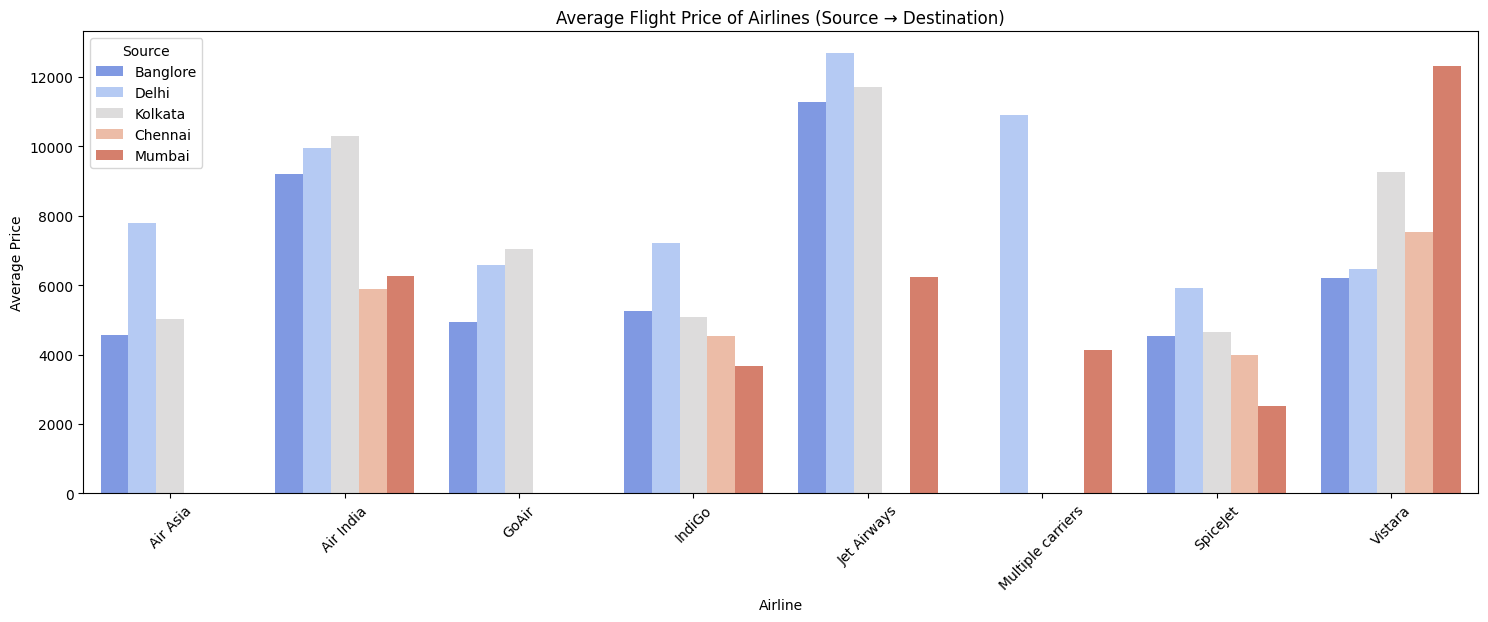

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data to get average price
airline_price = df.groupby(['Airline', 'Source', 'Destination'])['Price'].mean().reset_index()

# Set figure size
plt.figure(figsize=(18, 6))

# Create barplot
sns.barplot(data=airline_price, x='Airline', y='Price', hue='Source', dodge=True, palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.title("Average Flight Price of Airlines (Source → Destination)")

# Show plot
plt.legend(title="Source")
plt.show()


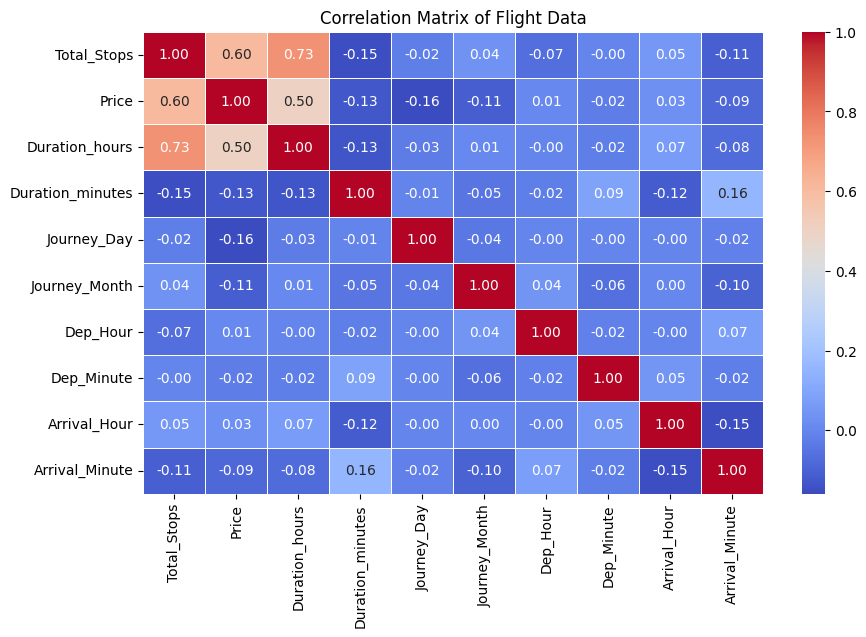

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Flight Data")

# Show plot
plt.show()


<ipython-input-35-b4a07898fb23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Route'].value_counts().index, x=df['Route'].value_counts().values, palette='viridis')


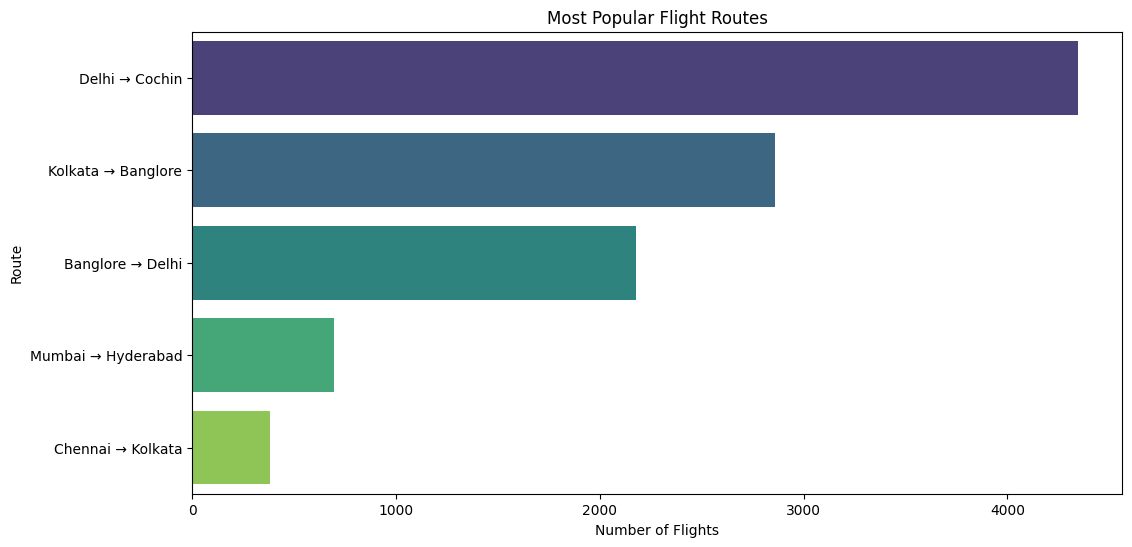

In [35]:
plt.figure(figsize=(12, 6))
df['Route'] = df['Source'] + " → " + df['Destination']
sns.barplot(y=df['Route'].value_counts().index, x=df['Route'].value_counts().values, palette='viridis')
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.title("Most Popular Flight Routes")
plt.show()


In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Duration_Category', y='Price', estimator=np.mean, palette='viridis')
plt.xlabel("Flight Duration Category")
plt.ylabel("Average Price")
plt.title("Average Flight Price by Duration Category")
plt.show()


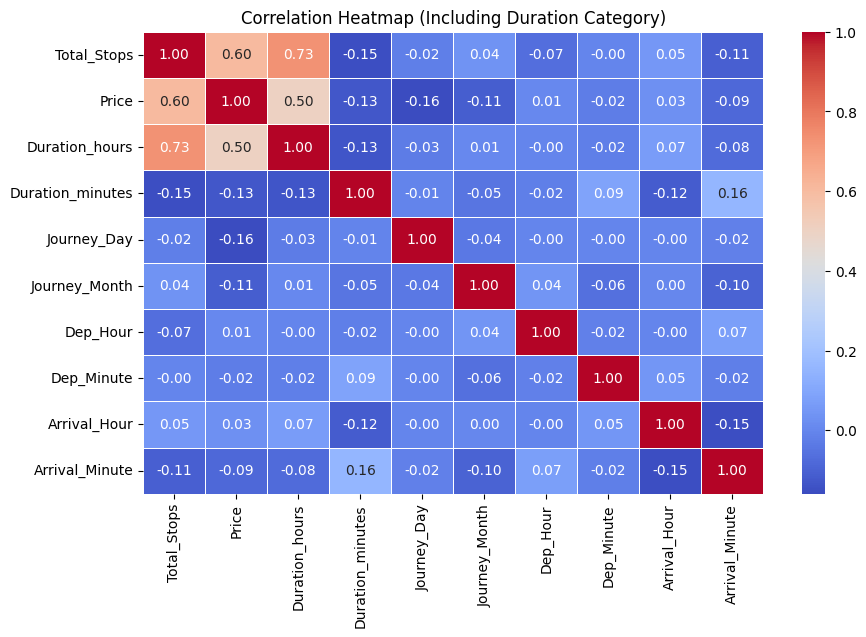

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Selecting only numerical columns including encoded duration category
numerical_cols = ['Total_Stops', 'Price', 'Duration_hours', 'Duration_minutes',
                  'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
                  'Arrival_Hour', 'Arrival_Minute']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap (Including Duration Category)")
plt.show()


In [38]:
from sklearn.model_selection import train_test_split

# Selecting features (X) and target variable (y)
X = df.drop(columns=['Price'])  # Features (excluding target)
y = df['Price']  # Target variable

# Splitting the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of train & test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8369, 13)
X_test shape: (2093, 13)
y_train shape: (8369,)
y_test shape: (2093,)


In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_cols = ['Airline', 'Source', 'Destination']  # Add all categorical columns
numerical_cols = ['Total_Stops', 'Duration_hours', 'Duration_minutes',
                  'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
                  'Arrival_Hour', 'Arrival_Minute']

# Create ColumnTransformer: One-Hot Encode categorical & Scale numerical
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)
])

# Fit on training data and transform both train & test data
X_train_processed = preprocessor.fit_transform(X_train)  # Fit and transform on training set
X_test_processed = preprocessor.transform(X_test)  # Only transform test set

# Convert to DataFrame (Optional, for readability)
import pandas as pd
X_train_processed = pd.DataFrame(X_train_processed)
X_test_processed = pd.DataFrame(X_test_processed)

# Check processed data
print(X_train_processed.head())


    0    1    2    3    4    5    6    7    8    9   ...   17        18  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0 -1.218780   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.294344   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.294344   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.294344   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.294344   

         19        20        21        22        23        24        25  \
0 -1.079957  0.104750 -1.478344  0.258691 -0.606099 -0.765588 -0.497844   
1 -0.124486 -1.679483 -0.530614  0.258691 -0.431530 -1.296909  0.820609   
2  0.592118  0.104750 -1.478344  1.119863 -0.431530 -1.296909 -1.816298   
3 -0.721655  1.294239 -0.886013  0.258691 -0.780667 -0.765588 -0.058360   
4  1.189287 -0.787367  0.890981 -1.463652  1.837862 -1.296909  0.820609   

         26  
0  0.920318  
1 -1.493958  
2  0.316749  
3 -1.493958  
4 -0.588604  

[5 rows x 27 

In [40]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV


In [41]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_processed, y_train)

    # Predictions
    y_pred = model.predict(X_test_processed)

    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Root Mean Squared Error (Manually computed)
    r2 = r2_score(y_test, y_pred)  # R-squared Score
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

    # Store results
    results[name] = {"RMSE": rmse, "R² Score": r2, "MAE": mae}

    # Print results
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}, MAE = {mae:.2f}\n")

# Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


Training Linear Regression...
Linear Regression: RMSE = 3000.03, R² = 0.57, MAE = 2031.48

Training Lasso Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+09, tolerance: 1.801e+07
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = 3000.01, R² = 0.57, MAE = 2031.38

Training Ridge Regression...
Ridge Regression: RMSE = 2999.99, R² = 0.57, MAE = 2031.39

Training KNN Regressor...
KNN Regressor: RMSE = 2414.23, R² = 0.72, MAE = 1432.92

Training Decision Tree...
Decision Tree: RMSE = 2641.37, R² = 0.67, MAE = 1409.83

Training Random Forest...
Random Forest: RMSE = 2021.06, R² = 0.80, MAE = 1189.89

                          RMSE  R² Score          MAE
Linear Regression  3000.028271  0.568343  2031.476149
Lasso Regression   3000.008449  0.568349  2031.383133
Ridge Regression   2999.985126  0.568355  2031.390881
KNN Regressor      2414.229014  0.720459  1432.924224
Decision Tree      2641.372806  0.665383  1409.831143
Random Forest      2021.056053  0.804095  1189.886853


In [42]:
# Train the final Random Forest model
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit on the training data
final_rf.fit(X_train_processed, y_train)

# Predict on test data
y_pred_final = final_rf.predict(X_test_processed)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics
rmse_final = mean_squared_error(y_test, y_pred_final) ** 0.5  # Manually calculate RMSE
r2_final = r2_score(y_test, y_pred_final)  # R² Score
mae_final = mean_absolute_error(y_test, y_pred_final)  # MAE

# Print results
print(f"Final Model Performance:")
print(f"RMSE: {rmse_final:.2f}")
print(f"R² Score: {r2_final:.2f}")
print(f"MAE: {mae_final:.2f}")


Final Model Performance:
RMSE: 2021.06
R² Score: 0.80
MAE: 1189.89


In [44]:
import numpy as np

def get_user_input():
    print("\nEnter flight details to predict the price:")

    # User input
    airline = input("Enter Airline: ")
    source = input("Enter Source City: ")
    destination = input("Enter Destination City: ")
    total_stops = int(input("Enter Total Stops (0 for non-stop, 1 for one-stop, etc.): "))

    # Flight Duration
    duration_hours = int(input("Enter Flight Duration (hours): "))
    duration_minutes = int(input("Enter Flight Duration (minutes): "))

    # Date & Time
    journey_day = int(input("Enter Journey Day (1-31): "))
    journey_month = int(input("Enter Journey Month (1-12): "))
    dep_hour = int(input("Enter Departure Hour (0-23): "))
    dep_minute = int(input("Enter Departure Minute (0-59): "))
    arrival_hour = int(input("Enter Arrival Hour (0-23): "))
    arrival_minute = int(input("Enter Arrival Minute (0-59): "))

    # Convert input to DataFrame
    user_data = np.array([[airline, source, destination, total_stops,
                           duration_hours, duration_minutes, journey_day, journey_month,
                           dep_hour, dep_minute, arrival_hour, arrival_minute]])

    return user_data


In [45]:
import pandas as pd

def preprocess_input(user_data):
    user_df = pd.DataFrame(user_data, columns=['Airline', 'Source', 'Destination', 'Total_Stops',
                                               'Duration_hours', 'Duration_minutes', 'Journey_Day', 'Journey_Month',
                                               'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute'])

    # Apply the same transformations as training data
    user_processed = preprocessor.transform(user_df)

    return user_processed


In [46]:
def predict_price(model, user_processed):
    price_prediction = model.predict(user_processed)[0]
    print(f"\nPredicted Flight Price: ₹{price_prediction:.2f}")


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model (if not already trained)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_processed, y_train)

# Get user input
user_data = get_user_input()

# Preprocess the input
user_processed = preprocess_input(user_data)

# Predict the price
predict_price(random_forest_model, user_processed)



Enter flight details to predict the price:
Enter Airline: Indigo
Enter Source City: Delhi
Enter Destination City: Mumbai
Enter Total Stops (0 for non-stop, 1 for one-stop, etc.): 2
Enter Flight Duration (hours): 4
Enter Flight Duration (minutes): 0
Enter Journey Day (1-31): 1
Enter Journey Month (1-12): 1
Enter Departure Hour (0-23): 4
Enter Departure Minute (0-59): 0
Enter Arrival Hour (0-23): 8
Enter Arrival Minute (0-59): 0

Predicted Flight Price: ₹12894.42
